### Drawing a network diagram of the _C. elegans_ connectome (Witvliet et al., _Nature_ 2021).
---
*Last updated: 1 July 2024*

In all animals, neurons transmit signals through two main types of synaptic connections: chemical synapses and electrical synapses, the latter also known as gap junctions. Chemical synapses are morphologically and functionally asymmetric junctions formed between a neuron and its targets (neuron or muscle). In contrast, electrical synapses or gap junctions are morphologically symmetrical, defined by two electron-dense membranes that can be as narrow as 2–3 nm apart.

In [3]:
# imports
import os
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from utils import ROOT_DIR, NEURON_LABELS
from visualize._utils import draw_connectome
from torch_geometric.utils import to_dense_adj

In [17]:
# load the raw data
graph_tensors = torch.load(
    os.path.join(ROOT_DIR, "data", "processed", "connectome", "graph_tensors_white1986_jse.pt")
)  # options: "graph_tensors.pt", "graph_tensors_witvliet2020_7.pt", "graph_tensors_witvliet2020_8.pt", "graph_tensors_cook2019.pt", "graph_tensors_openworm.pt"

# make the graph
graph = Data(**graph_tensors)

# investigate the graph
print(
    "Attributes:",
    "\n",
    graph.keys,
    "\n",
    f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, "
    f"Num. node features {graph.num_node_features}",
    end="\n",
)
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}")

Attributes: 
 <bound method BaseData.keys of Data(
  x=[300, 1024],
  edge_index=[2, 44901],
  edge_attr=[44901, 2],
  y=[300],
  pos={
    0=[3],
    1=[3],
    2=[3],
    3=[3],
    4=[3],
    5=[3],
    6=[3],
    7=[3],
    8=[3],
    9=[3],
    10=[3],
    11=[3],
    12=[3],
    13=[3],
    14=[3],
    15=[3],
    16=[3],
    17=[3],
    18=[3],
    19=[3],
    20=[3],
    21=[3],
    22=[3],
    23=[3],
    24=[3],
    25=[3],
    26=[3],
    27=[3],
    28=[3],
    29=[3],
    30=[3],
    31=[3],
    32=[3],
    33=[3],
    34=[3],
    35=[3],
    36=[3],
    37=[3],
    38=[3],
    39=[3],
    40=[3],
    41=[3],
    42=[3],
    43=[3],
    44=[3],
    45=[3],
    46=[3],
    47=[3],
    48=[3],
    49=[3],
    50=[3],
    51=[3],
    52=[3],
    53=[3],
    54=[3],
    55=[3],
    56=[3],
    57=[3],
    58=[3],
    59=[3],
    60=[3],
    61=[3],
    62=[3],
    63=[3],
    64=[3],
    65=[3],
    66=[3],
    67=[3],
    68=[3],
    69=[3],
    70=[3],
    71=[3],
    72=[3]

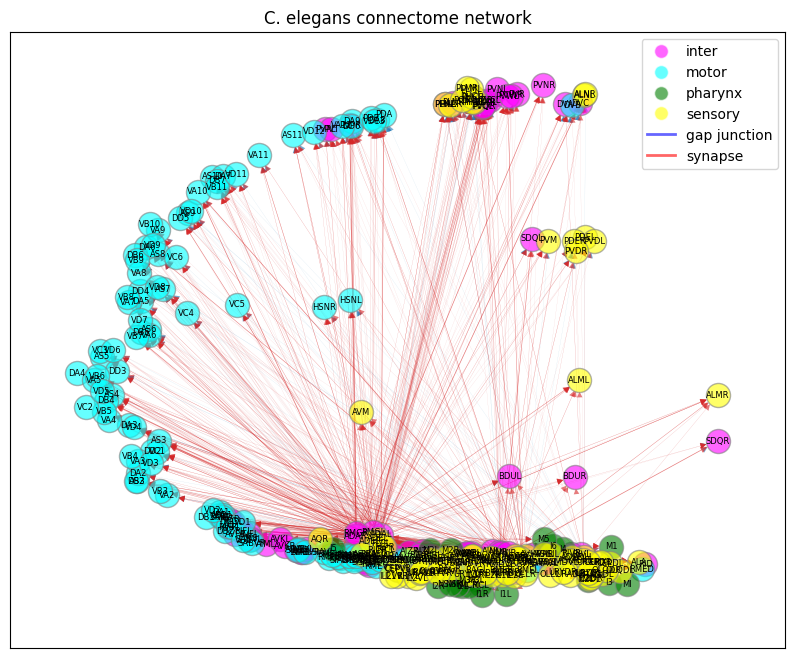

In [13]:
# # enable interactive plotting in Jupyter
# %matplotlib widget

# draw the connectome
draw_connectome(graph, plot_3d=False)
# draw_connectome(graph, plot_3d=True)

tensor([0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
        3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 3, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
        0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

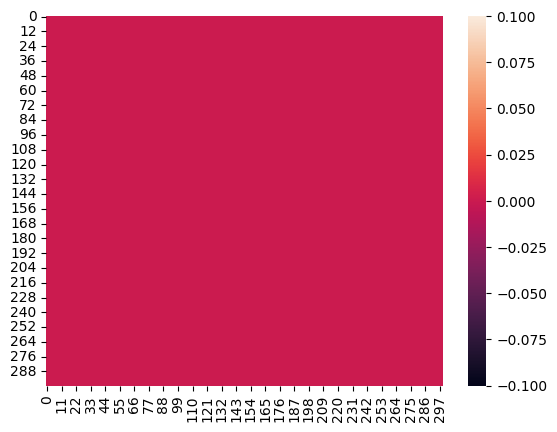

torch.Size([300, 300])


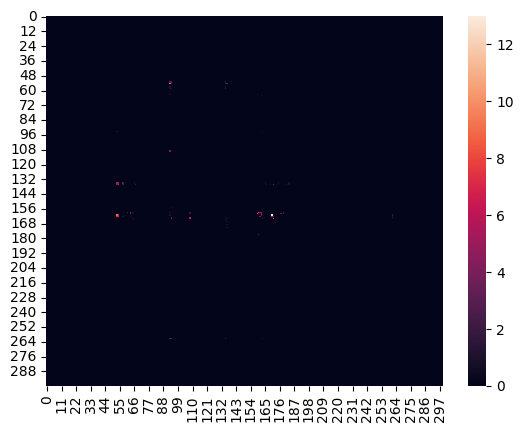

True


In [18]:
### DEBUG ###
# Test the gap junctions and chemical synapses are symmetric and asymmetric, respectively

print(graph.y)
print(graph.num_nodes)

gap_junctions = to_dense_adj(
    edge_index=graph.edge_index, edge_attr=graph.edge_attr[:, 0]
).squeeze(0)
print(gap_junctions.shape)
sns.heatmap(gap_junctions)
plt.show()

chemical_synapses = to_dense_adj(
    edge_index=graph.edge_index, edge_attr=graph.edge_attr[:, 1]
).squeeze(0)
print(chemical_synapses.shape)
sns.heatmap(chemical_synapses)
plt.show()

print(torch.allclose(gap_junctions.T, gap_junctions))

assert torch.allclose(gap_junctions.T, gap_junctions), "Gap junction connectome is an undirected graph and thus should be symmetric!" # the gap junctions are symmetric
assert not torch.allclose(chemical_synapses.T, chemical_synapses), "Chemical synapse connectome a directed graph and thus should asymmetric!" # the chemical synapses are not symmetric

### DEBUG ###